In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Load the data
df = pd.read_excel('/content/drive/MyDrive/CSCE5310/essay_set1_dataset.xlsx')




In [ ]:
# 2. Define the target score column and the key word columns
SCORE_COL = 'domain1_score'

KEY_FEATURES = ['society', 'people', 'well', 'year', 'important', 'time', 'life', 'benefit', 'computer']



In [ ]:
# 3. Calculate the average frequency of the key words for each Domain Score
avg_word_counts = df.groupby(SCORE_COL)[KEY_FEATURES].mean().reset_index()

# 4. Reshape the data for plotting (long format is preferred by seaborn)
# Melt the dataframe to have one row per Score-Word-Average combination
plot_df = avg_word_counts.melt(
    id_vars=SCORE_COL,
    value_vars=KEY_FEATURES,
    var_name='Word',
    value_name='Average Frequency'
)


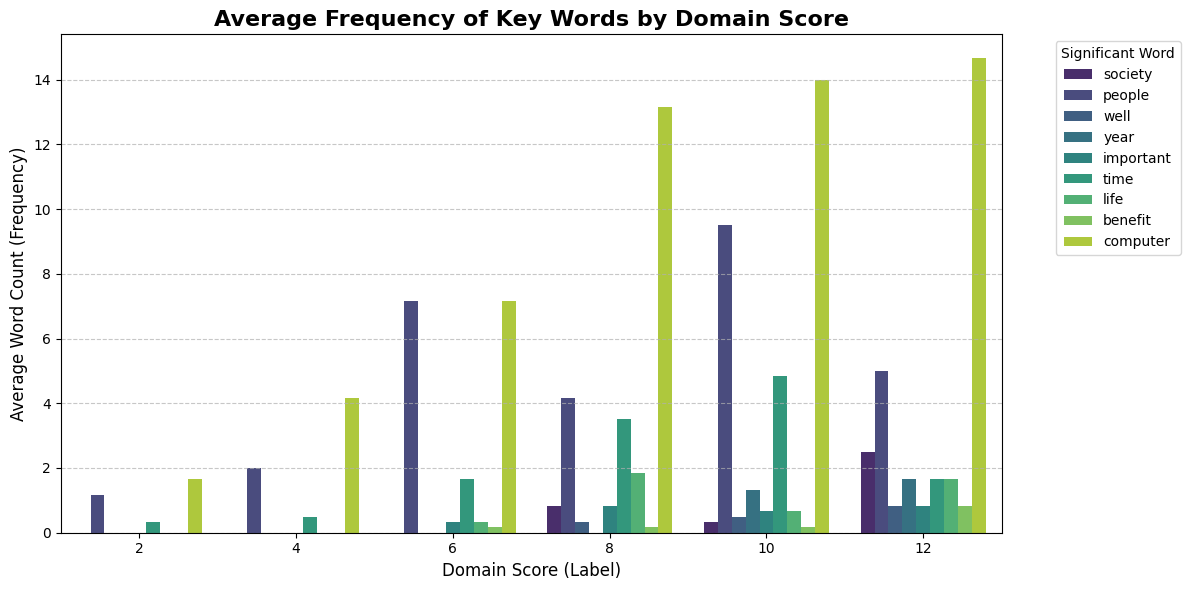

In [ ]:
# 5. Generate the Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=plot_df,
    x=SCORE_COL,
    y='Average Frequency',
    hue='Word',
    palette='viridis'
)

# Set the plot titles and labels
plt.title('Average Frequency of Key Words by Domain Score', fontsize=16, fontweight='bold')
plt.xlabel('Domain Score (Label)', fontsize=12)
plt.ylabel('Average Word Count (Frequency)', fontsize=12)

# Move the legend outside the plot area
plt.legend(title='Significant Word', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Data extracted manually from the image snippet
data = {
    'stopword_count': [175, 250, 162, 227, 251, 342, 220, 210, 250, 150, 177, 198, 140, 189, 173, 116, 169, 175, 78, 77, 68, 84, 133, 190, 24, 59, 93, 66, 61, 46, 16, 3, 32, 20, 23, 9],
    'domain1_score': [12, 12, 12, 12, 12, 12, 10, 10, 10, 10, 10, 10, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2]
}

df = pd.DataFrame(data)

In [ ]:
# Define columns
SCORE_COL = 'domain1_score'
COUNT_COL = 'stopword_count'

/tmp/ipython-input-768697963.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


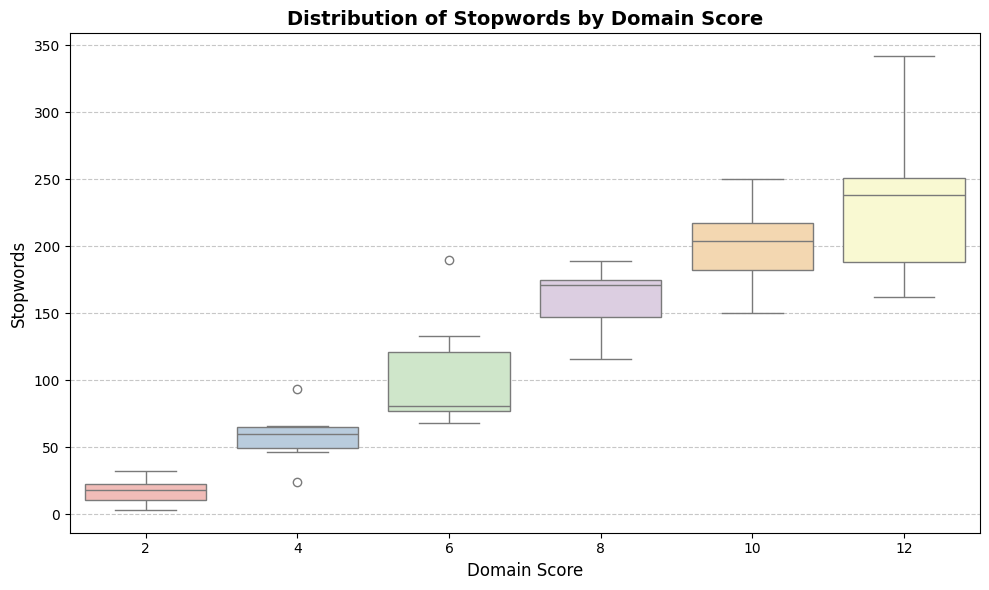

In [ ]:

# 1. Generate the Box Plot
plt.figure(figsize=(10, 6))

# Use seaborn boxplot for clear distribution visualization
sns.boxplot(
    data=df,
    x=SCORE_COL,
    y=COUNT_COL,
    palette='Pastel1',
    order=sorted(df[SCORE_COL].unique()) # Ensure scores are ordered correctly
)

# 2. Add titles and labels
plt.title('Distribution of Stopwords by Domain Score', fontsize=14, fontweight='bold')
plt.xlabel('Domain Score', fontsize=12)
plt.ylabel('Stopwords', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 3. Display the plot
plt.tight_layout()
plt.show()

In [19]:
# Define paths (consistent with the previous steps)
dataset_path = "/content/drive/MyDrive/CSCE5310/essay_set1_dataset.xlsx"
essay_text_path = "/content/drive/MyDrive/CSCE5310/chosen_essay_set_1.xlsx"
summary_output_path = "/content/drive/MyDrive/CSCE5310/essay_summary_count.xlsx"


In [21]:
try:
    # 1. Load the essay text file and calculate Total Word Count
    # Assuming the essays are separated by whitespace
    df_essays = pd.read_excel(essay_text_path)
    df_essays['total_words'] = df_essays['essay'].apply(lambda x: len(str(x).split()))

    # Extract just the required columns and Document number for merging
    df_total_words = df_essays[['document_number', 'total_words']].copy()

    # 2. Load the primary dataset (which contains the stopword_count column and domain1_score)
    df_main = pd.read_excel(dataset_path)

    # 3. Define columns and merge
    score_col = "domain1_score"
    stopword_col = "stopword_count"
    doc_col = "Document number" # Column name for the document ID in df_main

    # Check for the existence of required columns
    if score_col not in df_main.columns or stopword_col not in df_main.columns:
        print(f"Error: Required columns ('{score_col}' or '{stopword_col}') not found in {dataset_path}.")
        print("Please ensure the preceding code block that created this file was executed successfully.")
        exit()

    # Rename the Document column in df_main for a consistent merge key
    df_main.rename(columns={doc_col: 'document_number'}, inplace=True)

    # Merge the total word count with the main dataset using the document ID
    df_summary = pd.merge(
        df_total_words,
        df_main[['document_number', stopword_col, score_col]],
        on='document_number',
        how='inner' # Only keep essays present in both files
    )

    # 4. Create the final summary DataFrame and rename columns
    df_summary = df_summary[['total_words', stopword_col, score_col]].copy()

    # Rename columns to match the requested output (total_words, stopword_count, domain_score)
    df_summary.rename(columns={score_col: 'domain_score'}, inplace=True)

    # 5. Save the DataFrame to the specified Excel file
    df_summary.to_excel(summary_output_path, index=False)

    print("--- ✅ Summary File Successfully Created ---")
    print(f"File saved to: {summary_output_path}")
    print("Total essays processed:", len(df_summary))
    print("\nPreview of the new summary DataFrame:")
    print(df_summary.head().to_markdown(index=False, numalign="left", stralign="left"))

except FileNotFoundError as e:
    print(f"Error: A required file was not found. Details: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- ✅ Summary File Successfully Created ---
File saved to: /content/drive/MyDrive/CSCE5310/essay_summary_count.xlsx
Total essays processed: 36

Preview of the new summary DataFrame:
| total_words   | stopword_count   | domain_score   |
|:--------------|:-----------------|:---------------|
| 417           | 175              | 12             |
| 505           | 250              | 12             |
| 421           | 162              | 12             |
| 526           | 227              | 12             |
| 525           | 251              | 12             |


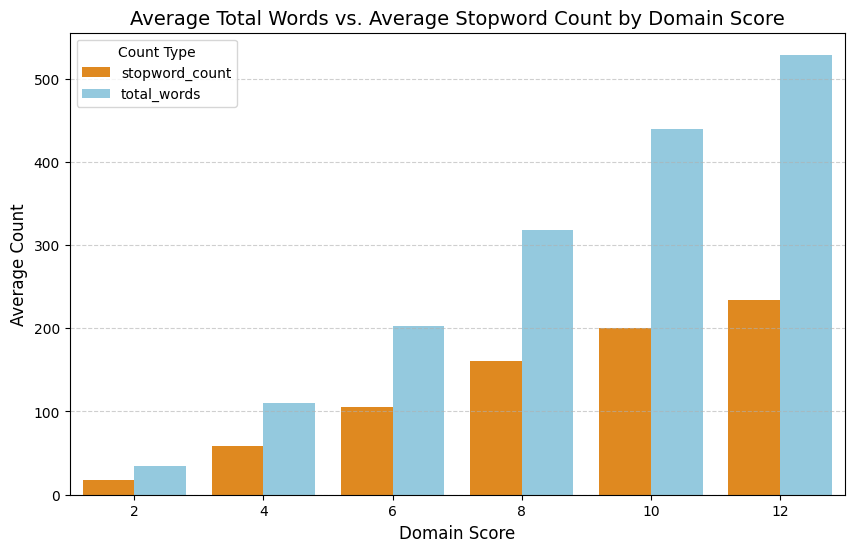

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the summary data file
file_name = "/content/drive/MyDrive/CSCE5310/essay_summary_count.xlsx"
df = pd.read_excel(file_name)

# Ensure domain_score is treated as a categorical variable for plotting
# and is sorted numerically for the X-axis
df['domain_score'] = df['domain_score'].astype(int)
score_order = sorted(df['domain_score'].unique())

# 1. Prepare data for visualization: Melt the DataFrame to long format
# This stacks the 'total_words' and 'stopword_count' columns into a single 'Count_Type' column.
plot_df = df.melt(
    id_vars='domain_score',
    value_vars=['total_words', 'stopword_count'],
    var_name='Count_Type',
    value_name='Count_Value'
)

# 2. Calculate the average count for each Count_Type grouped by Domain Score
avg_plot_df = plot_df.groupby(['domain_score', 'Count_Type'])['Count_Value'].mean().reset_index()

# 3. Generate the Grouped Bar Chart
plt.figure(figsize=(10, 6))

sns.barplot(
    data=avg_plot_df,
    x='domain_score',
    y='Count_Value',
    hue='Count_Type',
    palette={'total_words': 'skyblue', 'stopword_count': 'darkorange'},
    order=score_order # Order the X-axis numerically
)

# Set the plot labels and title
plt.title('Average Total Words vs. Average Stopword Count by Domain Score', fontsize=14)
plt.xlabel('Domain Score', fontsize=12)
plt.ylabel('Average Count', fontsize=12)
plt.legend(title='Count Type', loc='upper left')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Save the plot
plt.savefig('average_word_vs_stopword_count_by_score.png')
plt.show()

In [23]:
# Load the summary data file
file_name = "/content/drive/MyDrive/CSCE5310/essay_summary_count.xlsx"
df = pd.read_excel(file_name)

In [24]:
# 1. Add a Document Identifier Column (using the DataFrame index)
df['Document Index'] = df.index

In [25]:
# 2. Sort the data by Domain Score, then by Total Word Count for better visualization
df_sorted = df.sort_values(by=['domain_score', 'total_words'], ascending=[False, True])
df_sorted['Document Label'] = 'Doc ' + df_sorted['Document Index'].astype(str)


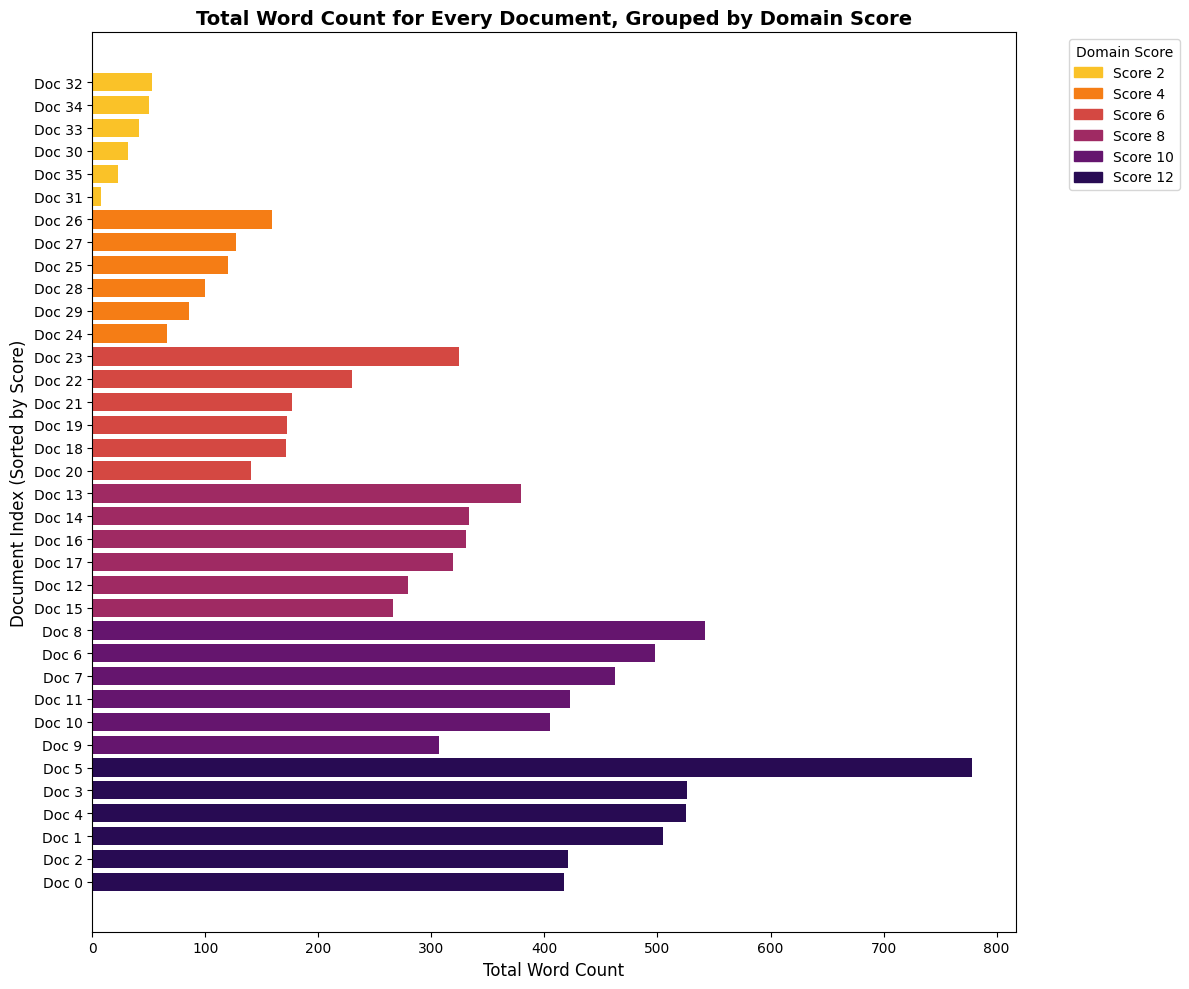

In [26]:
# 3. Generate the Horizontal Bar Graph
plt.figure(figsize=(12, 10))

# Create a color mapping based on Domain Score
# This groups the bars visually by score, which is essential for readability
palette = sns.color_palette("inferno", n_colors=df_sorted['domain_score'].nunique())
score_to_color = {score: palette[i] for i, score in enumerate(df_sorted['domain_score'].unique())}
colors = df_sorted['domain_score'].map(score_to_color)

# Plotting the individual word counts
plt.barh(
    y=df_sorted['Document Label'],
    width=df_sorted['total_words'],
    color=colors
)

# Set the plot labels and title
plt.title('Total Word Count for Every Document, Grouped by Domain Score', fontsize=14, fontweight='bold')
plt.xlabel('Total Word Count', fontsize=12)
plt.ylabel('Document Index (Sorted by Score)', fontsize=12)

# Create a custom legend for the domain scores
import matplotlib.patches as mpatches
handles = [mpatches.Patch(color=score_to_color[score], label=f'Score {score}')
           for score in sorted(df_sorted['domain_score'].unique())]
plt.legend(handles=handles, title='Domain Score', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and save
plt.tight_layout()
plt.savefig('total_words_for_all_documents_bar_graph.png')
plt.show()

In [29]:
# Load the summary data file
file_name = "/content/drive/MyDrive/CSCE5310/essay_summary_count.xlsx"
df = pd.read_excel(file_name)

In [30]:
# 1. Add the actual Document Name and sort
df['Document Name'] = 'd' + (df.index + 1).astype(str)
# Sort by score (high to low), then by word count (low to high)
df_sorted = df.sort_values(by=['domain_score', 'total_words'], ascending=[False, True]).reset_index(drop=True)

# The labels for the y-axis now come from the sorted 'Document Name' column
document_labels = df_sorted['Document Name'].tolist()

# Option for colour palettes are :

**Sequential Palettes (For Ordered Numeric Data)**
**Perceptually Uniform (Seaborn/Matplotlib Defaults):**
* viridis (The default, perceptually uniform, and colorblind-friendly)
* plasma
* inferno
* magma
* cividis (Optimized for people with color vision deficiency)
**Single-Hue (Good for Print/Grayscale Conversion):**
* Reds
* Blues
* Greens
* Purples
* Oranges
**Multi-Hue:**
* RdPu (Red-Purple)
* BuGn (Blue-Green)
* YlGnBu (Yellow-Green-Blue)

**Diverging Palettes (For Data Centered Around a Midpoint)**
* coolwarm (Blue/Red, often with white center)
* RdBu (Red/Blue)
* PuOr (Purple/Orange)
* PRGn (Purple/Green)
* bwr (Blue/White/Red)
* vlag (Varying lightness and chroma, good for continuous data)
* BrBG (Brown/Blue-Green)

**Qualitative / Categorical Palettes (For Unordered Data)**
**Matplotlib/Seaborn Defaults:**
* tab10 (Seaborn's default for up to 10 categories)
* tab20 (For up to 20 categories)
* Paired (Good for distinguishing pairs of categories)

**ColorBrewer Qualitative Sets:**
* Set1, Set2, Set3 (Excellent general-purpose sets, where Set2 is often used for visually softer charts)
* Pastel1, Pastel2 (Lighter, less saturated versions)
* Dark2 (Darker, more saturated versions)
* Accent
* Spectral (Often used as a sequential or pseudo-qualitative map)





In [53]:
# 2. Define the color mapping for the clusters
unique_scores = sorted(df_sorted['domain_score'].unique(), reverse=True)
# Use a distinct qualitative palette like 'Set2'
palette = sns.color_palette("Dark2", n_colors=len(unique_scores))
score_to_color = {score: palette[i] for i, score in enumerate(unique_scores)}
colors = df_sorted['domain_score'].map(score_to_color) # Map score to color for each bar

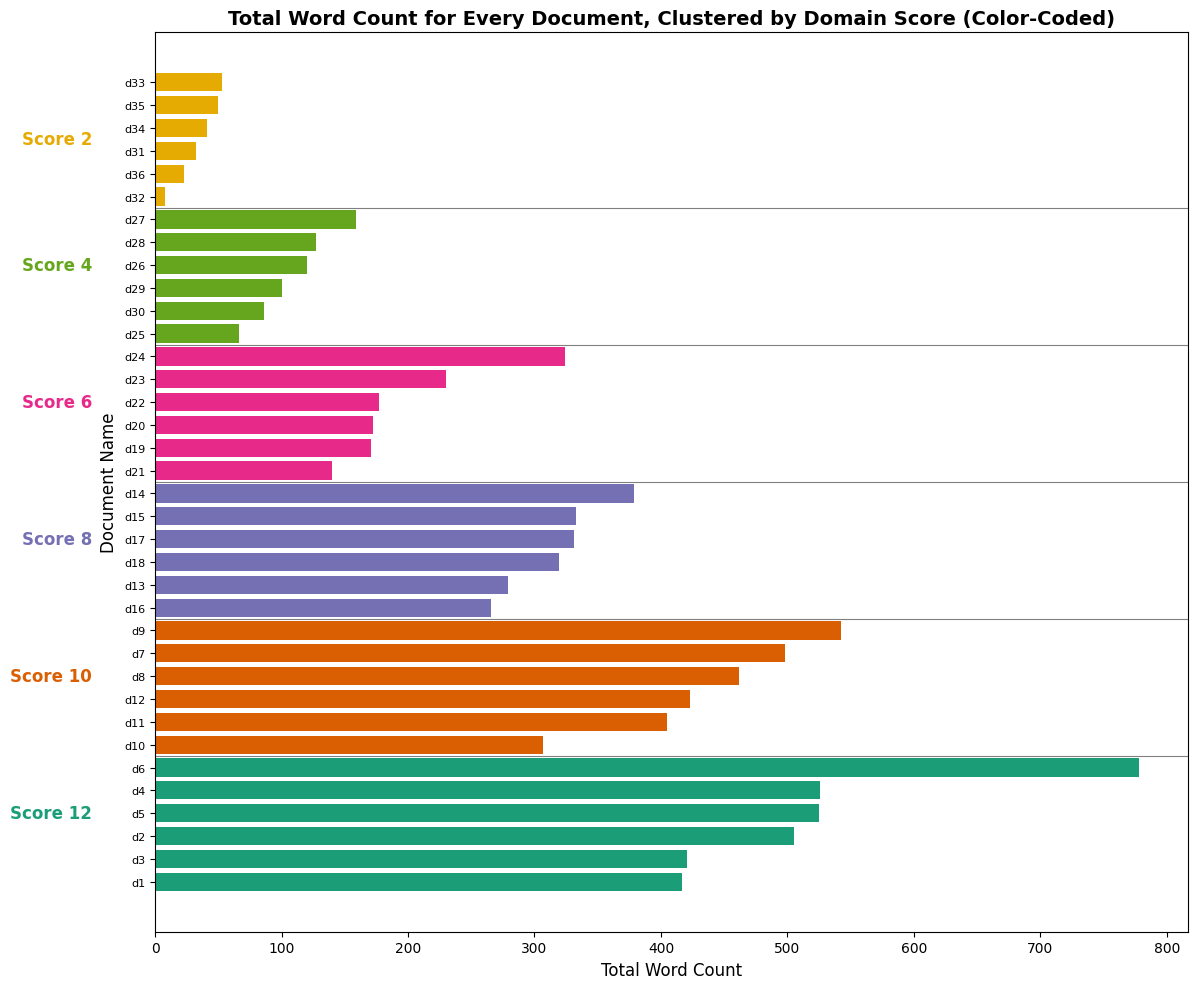

In [54]:
# 3. Prepare for plotting
plt.figure(figsize=(12, 10))

# 4. Draw the Horizontal Bar Plot, using the generated color list
plt.barh(
    y=df_sorted.index,
    width=df_sorted['total_words'],
    color=colors # Apply the cluster colors
)

# 5. Add separators and cluster labels (reusing the clustering logic)
cluster_labels = []
cluster_y_positions = []
current_score = None
break_points = []
y_pos = -0.5

for i, row in df_sorted.iterrows():
    if row['domain_score'] != current_score:
        if current_score is not None:
            break_points.append(y_pos)
            # Calculate center position for the cluster label
            cluster_y_positions.append(y_pos - (len(df_sorted[df_sorted['domain_score'] == current_score]) / 2) + 0.5)
            cluster_labels.append(f'{current_score}')
        current_score = row['domain_score']
    y_pos += 1
# Add the last cluster's label
cluster_y_positions.append(y_pos - (len(df_sorted[df_sorted['domain_score'] == current_score]) / 2))
cluster_labels.append(f'{current_score}')

# Draw black separator lines between clusters
for bp in break_points:
    plt.axhline(y=bp, color='black', linestyle='-', linewidth=0.8, alpha=0.5)

# 6. Customize the Y-axis (Document Labels and Clustered Titles)

# Use the 'Document Name' column for the y-axis tick labels
plt.yticks(ticks=df_sorted.index, labels=document_labels, fontsize=8)

# Add custom text labels for the score clusters to the far left
for label, y_center in zip(cluster_labels, cluster_y_positions):
    # Use the cluster color for the score label itself
    color_label = score_to_color[int(label)]
    plt.text(
        x=-50,
        y=y_center,
        s=f'Score {label}',
        fontsize=12,
        fontweight='bold',
        color=color_label, # Use the color to match the cluster
        ha='right',
        va='center',
        transform=plt.gca().transData,
        clip_on=False
    )

# 7. Final plot settings
plt.title('Total Word Count for Every Document, Clustered by Domain Score (Color-Coded)', fontsize=14, fontweight='bold')
plt.xlabel('Total Word Count', fontsize=12)
plt.ylabel('Document Name', fontsize=12)
plt.xlim(left=0)

# Adjust plot margins to make space for the new labels
plt.subplots_adjust(left=0.15)
plt.tight_layout()
plt.savefig('total_words_clustered_bar_graph_color_coded.png')
plt.show()